# Download data

In [1]:
!wget https://scanpy.readthedocs.io/en/stable/_sources/tutorials/basics/clustering.ipynb

--2026-01-13 10:04:00--  https://scanpy.readthedocs.io/en/stable/_sources/tutorials/basics/clustering.ipynb
Resolving scanpy.readthedocs.io (scanpy.readthedocs.io)... 104.18.1.163, 104.18.0.163, 2606:4700::6812:a3, ...
Connecting to scanpy.readthedocs.io (scanpy.readthedocs.io)|104.18.1.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3612294 (3.4M) [application/x-ipynb+json]
Saving to: ‘clustering.ipynb’

clustering.ipynb    100%[===================>]   3.44M  10.9MB/s    in 0.3s    

2026-01-13 10:04:01 (10.9 MB/s) - ‘clustering.ipynb’ saved [3612294/3612294]



* Você deve usar a biblioteca scenicplus!

In [24]:
import os
os.chdir("/home/victorffernandes/nscenicplus/scenicplus/myproject/scanpy")

In [ ]:
!mkdir -p data
!wget -O data/filtered_feature_bc_matrix.tar.gz https://cf.10xgenomics.com/samples/cell-arc/2.0.0/human_brain_3k/human_brain_3k_filtered_feature_bc_matrix.tar.gz

--2026-01-11 15:48:06--  https://cf.10xgenomics.com/samples/cell-arc/2.0.0/human_brain_3k/human_brain_3k_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170112442 (162M) [application/x-tar]
Saving to: ‘data/filtered_feature_bc_matrix.tar.gz’

data/filtered_featu 100%[===================>] 162.23M  22.0MB/s    in 8.4s    

2026-01-11 15:48:16 (19.3 MB/s) - ‘data/filtered_feature_bc_matrix.tar.gz’ saved [170112442/170112442]



In [ ]:
!cd data; tar -xzf filtered_feature_bc_matrix.tar.gz; cd ..


In [ ]:
!wget -O data/cell_data.tsv https://raw.githubusercontent.com/aertslab/pycisTopic/polars/data/cell_data_human_cerebellum.tsv


--2026-01-11 15:49:19--  https://raw.githubusercontent.com/aertslab/pycisTopic/polars/data/cell_data_human_cerebellum.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 309204 (302K) [text/plain]
Saving to: ‘data/cell_data.tsv’

data/cell_data.tsv  100%[===================>] 301.96K  --.-KB/s    in 0.04s   

2026-01-11 15:49:19 (7.46 MB/s) - ‘data/cell_data.tsv’ saved [309204/309204]



# Preprocessing

In [4]:
import scanpy as sc

In [5]:
adata = sc.read_10x_mtx(
    "data/filtered_feature_bc_matrix/",
    var_names = "gene_symbols"
)

In [6]:
adata.var_names_make_unique()

In [7]:
adata

AnnData object with n_obs × n_vars = 3233 × 36601
    var: 'gene_ids', 'feature_types'

In [8]:
import pandas as pd
cell_data = pd.read_table("data/cell_data.tsv", index_col = 0)
cell_data

,VSN_cell_type,VSN_leiden_res0.3,VSN_leiden_res0.6,VSN_leiden_res0.9,VSN_leiden_res1.2,VSN_sample_id,Seurat_leiden_res0.6,Seurat_leiden_res1.2,Seurat_cell_type
AAACAGCCATTATGCG-1-10x_multiome_brain,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_1 (1),MOL_B_3 (6),10x_multiome_brain,NFOL (1),MOL (1),MOL
AAACCAACATAGACCC-1-10x_multiome_brain,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_3 (5),MOL_B_4 (4),10x_multiome_brain,NFOL (1),NFOL (3),NFOL
AAACCGAAGATGCCTG-1-10x_multiome_brain,INH_VIP,INH_VIP (6),INH_VIP (8),INH_VIP (8),INH_VIP (10),10x_multiome_brain,INH_VIP (7),INH_VIP (6),INH_VIP
AAACCGAAGTTAGCTA-1-10x_multiome_brain,MOL_A,MOL_A (1),MOL_A_2 (1),MOL_A_1 (0),MOL_A_2 (0),10x_multiome_brain,NFOL (1),NFOL (3),NFOL
AAACCGCGTTAGCCAA-1-10x_multiome_brain,MGL,MGL (7),MGL (10),MGL (10),MGL (12),10x_multiome_brain,MGL (8),MGL (9),MGL
...,...,...,...,...,...,...,...,...,...
TTTGTGAAGGGTGAGT-1-10x_multiome_brain,INH_VIP,INH_VIP (6),INH_VIP (8),INH_VIP (8),INH_VIP (10),10x_multiome_brain,INH_SST (5),INH_SST (8),INH_SST
TTTGTGAAGTCAGGCC-1-10x_multiome_brain,AST_CER,AST_CER (2),AST_CER (2),AST_CER (2),AST_CER_1 (7),10x_multiome_brain,BG (2),BG (2),BG
TTTGTGGCATGCTTAG-1-10x_multiome_brain,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_1 (1),MOL_B_1 (1),10x_multiome_brain,MOL (0),MOL (1),MOL
TTTGTTGGTGATCAGC-1-10x_multiome_brain,MOL_A,MOL_A (1),MOL_A_2 (1),MOL_A_1 (0),MOL_A_1 (11),10x_multiome_brain,NFOL (1),NFOL (3),NFOL


In [9]:
cell_data.index = [cb.rsplit("-", 1)[0] for cb in cell_data.index]

In [10]:
adata = adata[list(set(adata.obs_names) & set(cell_data.index))].copy()


In [11]:
adata.obs = cell_data.loc[adata.obs_names]


In [12]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

# Data normalization

In [13]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

/home/victorffernandes/miniforge3/envs/newscenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [14]:
adata.obs

,VSN_cell_type,VSN_leiden_res0.3,VSN_leiden_res0.6,VSN_leiden_res0.9,VSN_leiden_res1.2,VSN_sample_id,Seurat_leiden_res0.6,Seurat_leiden_res1.2,Seurat_cell_type,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
CTTAGGAGTAGGATTT-1,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_1 (1),MOL_B_3 (6),10x_multiome_brain,NFOL (1),NFOL (3),NFOL,1936,4492.0,4.0,0.089047
GGTTACCCACCTGCTC-1,INH_SST,INH_SST (5),INH_SST (7),INH_SST (7),INH_SST (9),10x_multiome_brain,INH_SST (5),INH_SNCG (12),INH_SNCG,4543,16631.0,15.0,0.090193
GACACTAGTTTAAAGC-1,AST_CER,AST_CER (2),AST_CER (2),AST_CER (2),AST_CER_1 (7),10x_multiome_brain,BG (2),BG (2),BG,3116,7132.0,11.0,0.154234
CAAACATGTTTACTTG-1,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_1 (1),MOL_B_3 (6),10x_multiome_brain,MOL (0),MOL (0),MOL,2014,5090.0,5.0,0.098232
AGGCCCAGTGGAAGGC-1,INH_SST,INH_SST (5),INH_SST (7),INH_SST (7),INH_SST (9),10x_multiome_brain,INH_SST (5),INH_SNCG (12),INH_SNCG,4718,14575.0,11.0,0.075472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCAAGGAAGGAGTAAT-1,MOL_A,MOL_A (1),MOL_A_2 (1),MOL_A_1 (0),MOL_A_2 (0),10x_multiome_brain,MOL (0),MOL (0),MOL,1544,2829.0,1.0,0.035348
GGGTATTTCCCTGACT-1,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_1 (1),MOL_B_3 (6),10x_multiome_brain,NFOL (1),NFOL (3),NFOL,2133,6723.0,19.0,0.282612
CACAAGCGTTTGCAGA-1,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_1 (1),MOL_B_3 (6),10x_multiome_brain,NFOL (1),NFOL (3),NFOL,2471,7251.0,18.0,0.248242
TCCTCAATCATTGCGG-1,INH_PVALB,INH_PVALB (11),INH_PVALB (13),INH_PVALB (15),INH_PVALB (17),10x_multiome_brain,INH_PVALB (11),INH_PVALB (14),INH_PVALB,4616,18325.0,35.0,0.190996


In [16]:
import matplotlib.pyplot as plt
if not hasattr(plt.rcParams, "_get"):
    plt.rcParams._get = lambda key, default=None: plt.rcParams.get(key, default)

/home/victorffernandes/miniforge3/envs/newscenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


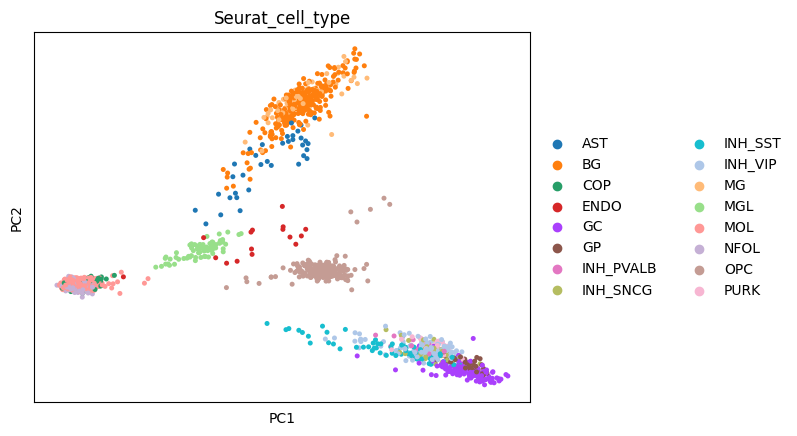

In [17]:
sc.tl.pca(adata)
sc.pl.pca(adata, color = "Seurat_cell_type")

In [18]:
sc.pp.neighbors(adata)

In [19]:
sc.tl.umap(adata)

/home/victorffernandes/miniforge3/envs/newscenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


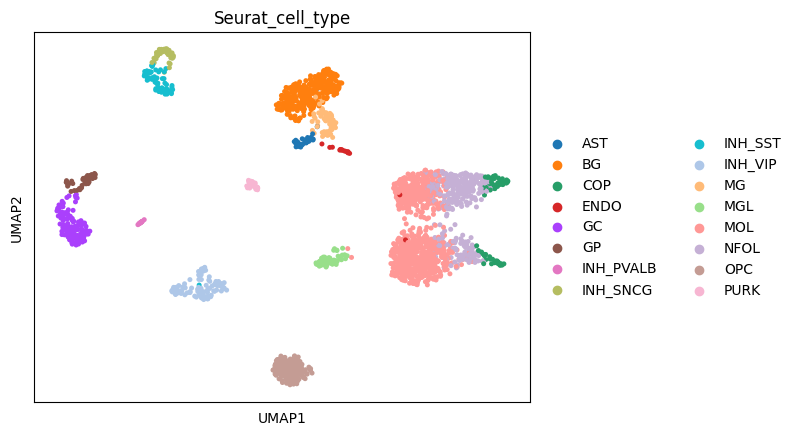

In [20]:
sc.pl.umap(adata, color = "Seurat_cell_type")

In [21]:
adata.write("../pycistopic/ppRNAs/adata.h5ad")